In [129]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report
import seaborn as sn

In [122]:
bank=pd.read_csv("bank-full.csv")

In [123]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
3,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
4,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
45207,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no
45208,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
45209,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes


In [124]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# There is no missing values in data set

In [125]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# There is no outlier present in data

In [126]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [128]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


# RELATIONSHIP between feature to feature is no correlated to eachother

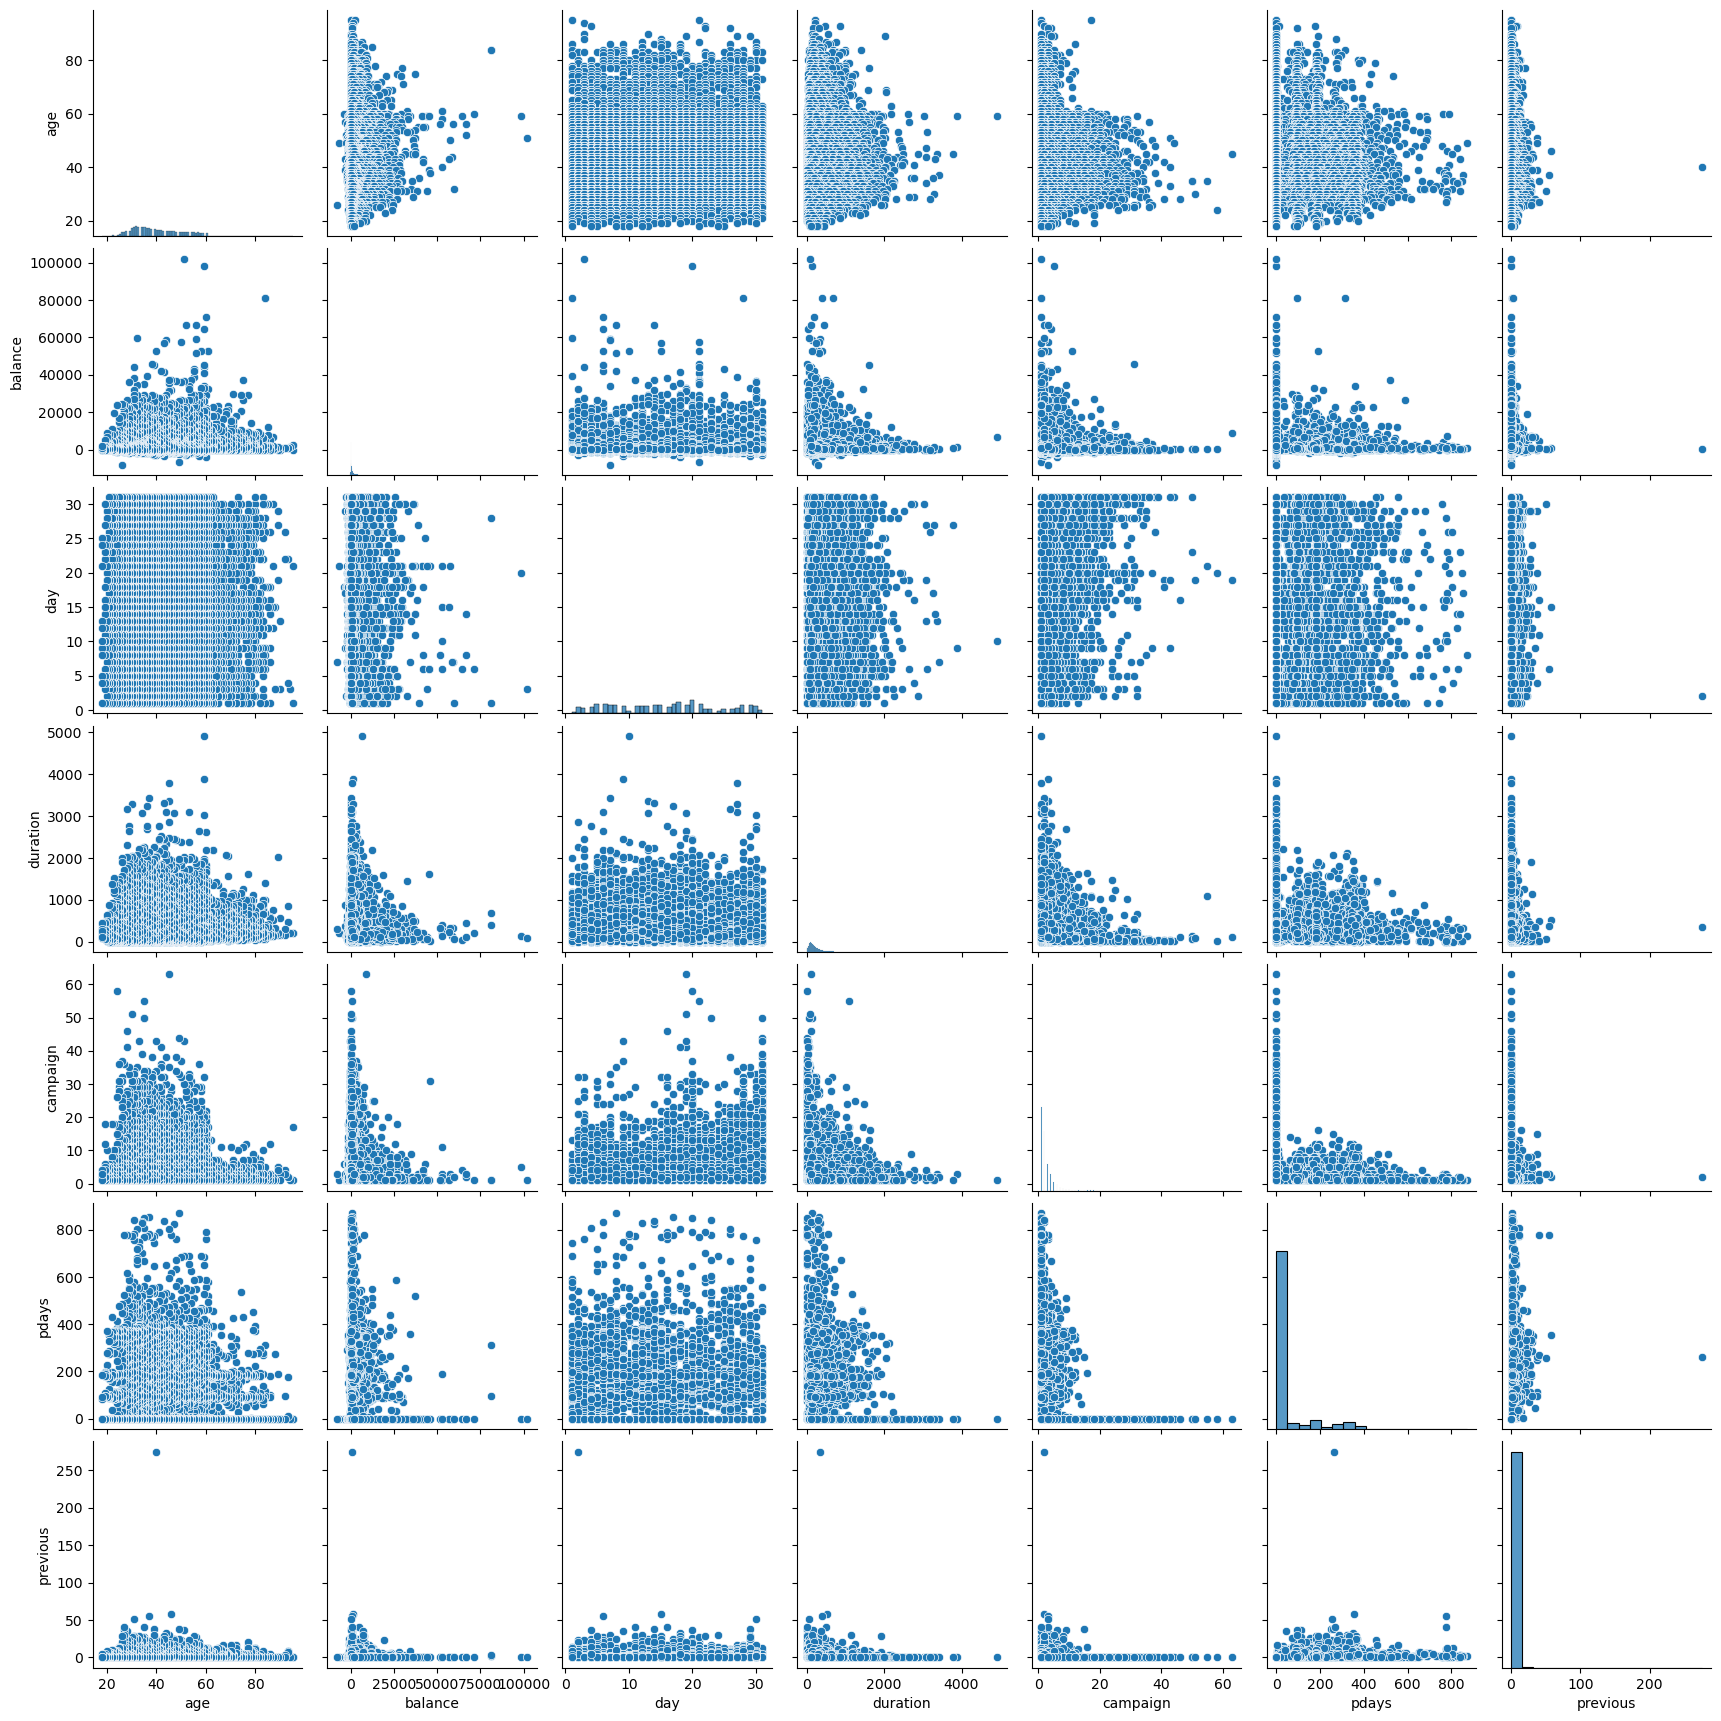

In [130]:
sn.pairplot(bank)

<AxesSubplot:>

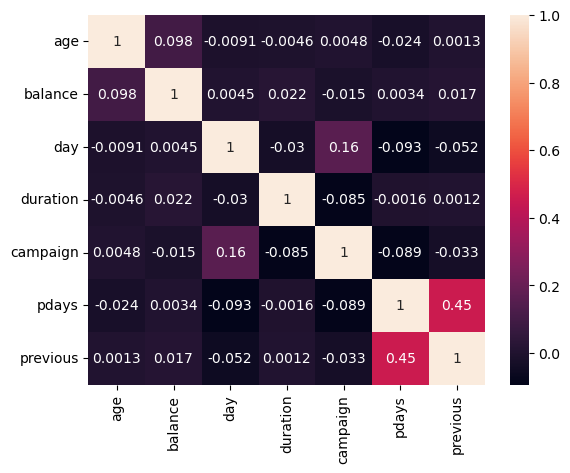

In [132]:
sn.heatmap(bank.corr(),annot=True)

# visualistion of correlation martix

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

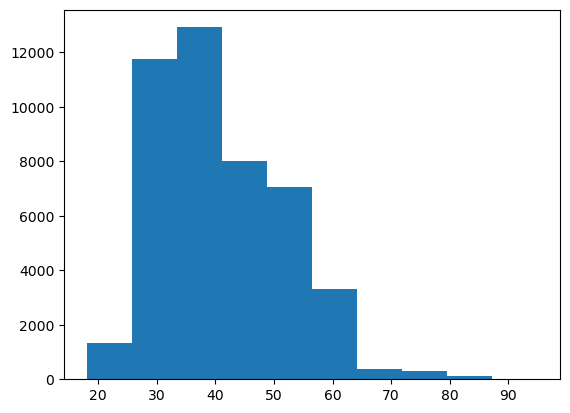

In [140]:
plt.hist(bank["age"])

# Most of the application is from age 30 to 60

In [142]:
pd.crosstab(bank["marital"],bank["y"])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


<AxesSubplot:xlabel='marital'>

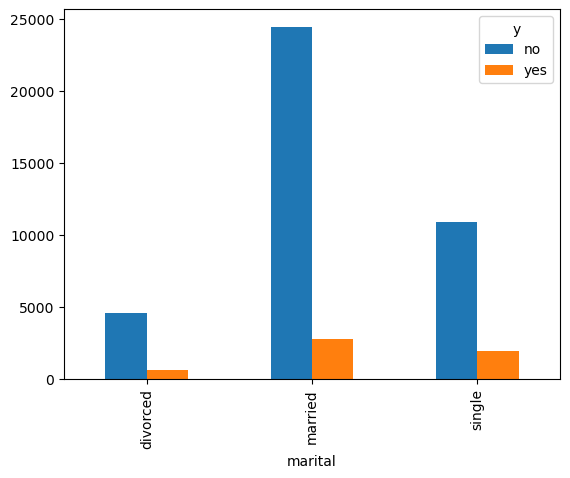

In [143]:
pd.crosstab(bank["marital"],bank["y"]).plot(kind="bar")

# marital status seems a strong predictor for the outcome variable

<AxesSubplot:xlabel='job'>

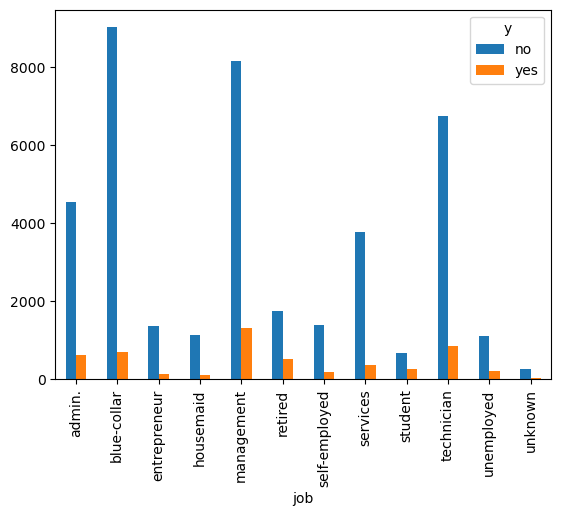

In [147]:
pd.crosstab(bank["job"],bank["y"]).plot(kind="bar")

# job has a strong predictor for output variable

<AxesSubplot:xlabel='education'>

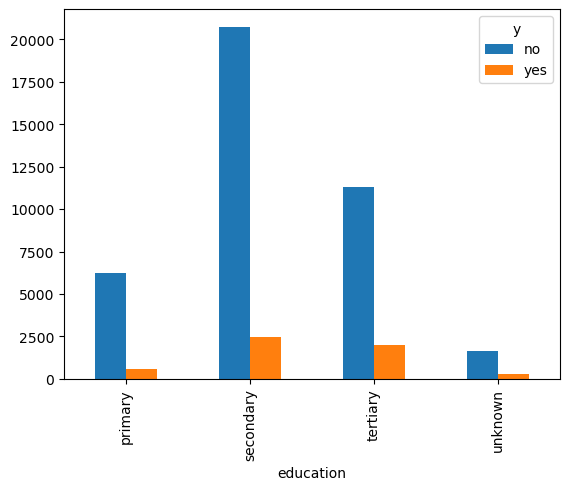

In [149]:
pd.crosstab(bank["education"],bank["y"]).plot(kind="bar")

# education has a strong predictor for output variable

<AxesSubplot:xlabel='contact'>

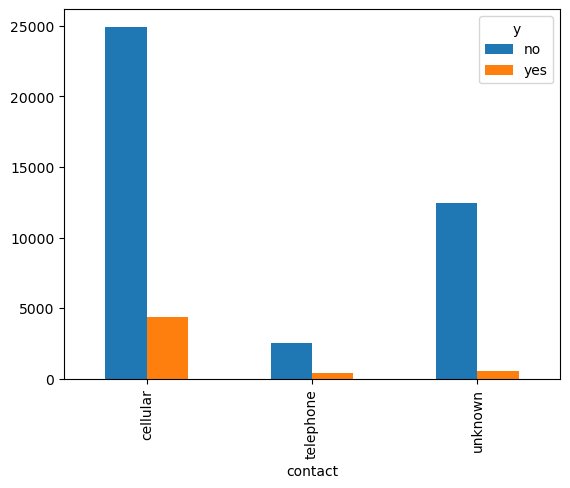

In [150]:
pd.crosstab(bank["contact"],bank["y"]).plot(kind="bar")

<AxesSubplot:xlabel='month'>

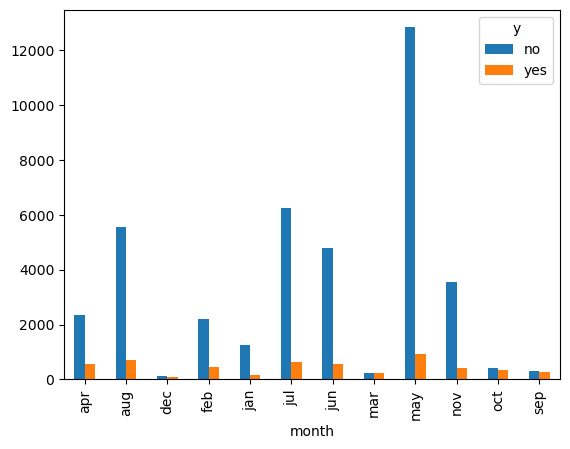

In [151]:
pd.crosstab(bank["month"],bank["y"]).plot(kind="bar")

<AxesSubplot:xlabel='housing'>

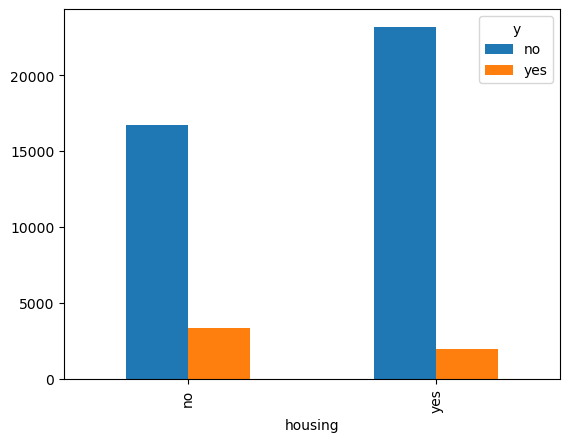

In [152]:
pd.crosstab(bank["housing"],bank["y"]).plot(kind="bar")

<AxesSubplot:xlabel='loan'>

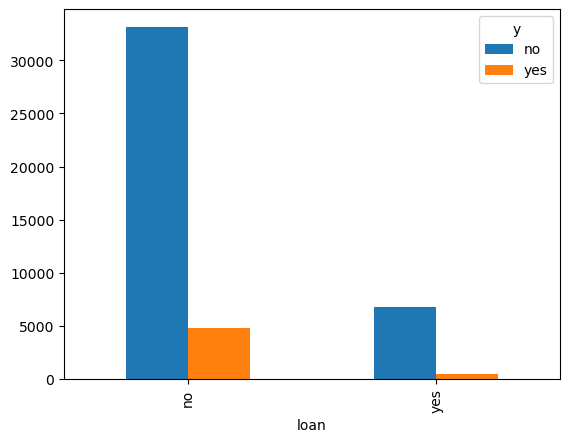

In [153]:
pd.crosstab(bank["loan"],bank["y"]).plot(kind="bar")

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

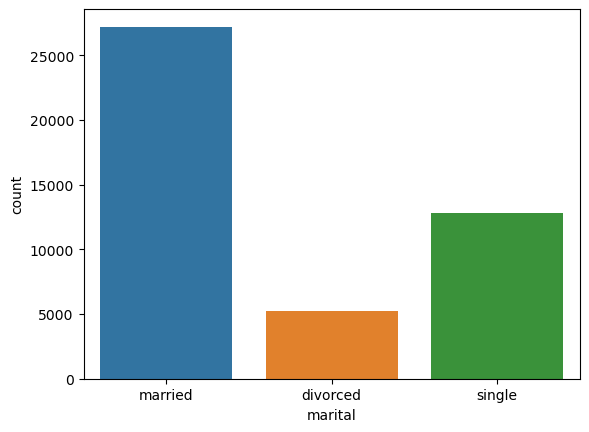

In [154]:
sn.countplot(bank["marital"])

In [104]:
bank1=bank.copy()
bank1["y"]=bank1["y"].map({"yes":1,"no":0})
bank1["loan"]=bank1["loan"].map({"yes":1,"no":0})
bank1["housing"]=bank1["housing"].map({"yes":1,"no":0})
bank1["default"]=bank1["default"].map({"yes":1,"no":0})

In [105]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,95,retired,married,secondary,0,0,0,0,telephone,1,oct,215,1,-1,0,unknown,0
1,95,retired,divorced,primary,0,2282,0,0,telephone,21,apr,207,17,-1,0,unknown,1
2,94,retired,divorced,secondary,0,1234,0,0,cellular,3,mar,212,1,-1,0,unknown,0
3,93,retired,married,unknown,0,775,0,0,cellular,4,aug,476,2,13,9,success,1
4,93,retired,married,unknown,0,775,0,0,cellular,22,jul,860,2,177,7,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,student,single,secondary,0,5,0,0,cellular,24,aug,143,2,-1,0,unknown,0
45207,18,student,single,secondary,0,156,0,0,cellular,4,nov,298,2,82,4,other,0
45208,18,student,single,primary,0,608,0,0,cellular,13,nov,210,1,93,1,success,1
45209,18,student,single,primary,0,608,0,0,cellular,12,aug,267,1,-1,0,unknown,1


In [106]:
bank1=pd.get_dummies(bank1,columns=["job","marital","education","contact","month","poutcome"])

In [107]:
bank1.shape

(45211, 49)

In [108]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [109]:
pd.set_option("display.max.columns",None)
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,95,0,0,0,0,1,215,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,95,0,2282,0,0,21,207,17,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,94,0,1234,0,0,3,212,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,93,0,775,0,0,4,476,2,13,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,93,0,775,0,0,22,860,2,177,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,0,5,0,0,24,143,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45207,18,0,156,0,0,4,298,2,82,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
45208,18,0,608,0,0,13,210,1,93,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,18,0,608,0,0,12,267,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [110]:
x=pd.concat([bank1.iloc[:,:10],bank1.iloc[:,11:]],axis=1)
y=bank1.iloc[:,10]

In [111]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,95,0,0,0,0,1,215,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,95,0,2282,0,0,21,207,17,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,94,0,1234,0,0,3,212,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,93,0,775,0,0,4,476,2,13,9,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,93,0,775,0,0,22,860,2,177,7,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,0,5,0,0,24,143,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45207,18,0,156,0,0,4,298,2,82,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
45208,18,0,608,0,0,13,210,1,93,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,18,0,608,0,0,12,267,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [112]:
y

0        0
1        1
2        0
3        1
4        1
        ..
45206    0
45207    0
45208    1
45209    1
45210    0
Name: y, Length: 45211, dtype: int64

In [113]:
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\Dell\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
classifier.predict_proba(x)

array([[9.10425049e-01, 8.95749508e-02],
       [9.99852379e-01, 1.47621108e-04],
       [8.88284333e-01, 1.11715667e-01],
       ...,
       [5.16488700e-01, 4.83511300e-01],
       [6.54104706e-01, 3.45895294e-01],
       [8.86202710e-01, 1.13797290e-01]])

In [116]:
data=pd.DataFrame({"Actual":y,"Prediction":y_pred})
data

,Actual,Prediction
0,0,0
1,1,0
2,0,0
3,1,0
4,1,1
...,...,...
45206,0,0
45207,0,0
45208,1,0
45209,1,0


In [117]:
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[39087,   835],
       [ 4036,  1253]], dtype=int64)

In [118]:
accuracy_score(y,y_pred)

0.8922607330074539

In [119]:
precision_score(y,y_pred)

0.600095785440613

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.24      0.34      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



In [70]:
classifier.predict_proba(x).shape


(45211, 2)

In [71]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thershold=roc_curve(y,classifier.predict_proba(x)[:,1])

In [72]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.98096288e-01, 9.98096288e-01, 1.00000000e+00])

In [73]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [74]:
thershold

array([1.99999993e+00, 9.99999925e-01, 9.99992936e-01, ...,
       4.85213268e-07, 4.78656926e-07, 1.31035609e-15])

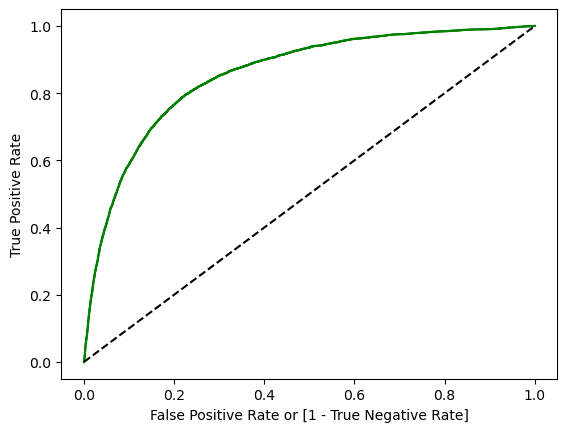

In [88]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color="green")
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='green',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()


In [91]:
y_pred=pd.DataFrame(y_pred)
y_pred.value_counts()

0    43123
1     2088
dtype: int64

In [92]:
(2088/(43123+2088))*100

4.6183450930083385

In [94]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [95]:
(5289/(39922+5289))*100

11.698480458295547

1 - Confusion Matrix:The result is telling us that we have 39455+1253 correct predictions and 4833+467 incorrect predictions.

2 - Accuracy == 89.22%
Of the entire data set, 89% of the clients will subcribe